In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random

In [ ]:
######function definitions
def sigmoid(z):
    z= 1/(1+np.exp(-z))
    return z

# Forward propagation
def forward_prop(w1,w2,x):
    #print(x.shape)
    z1 = np.dot(w1,x)
    a1 = sigmoid(z1)
    z2 = np.dot(w2,a1)
    a2 = sigmoid(z2)
    return z1,a1,z2,a2

# Backward propagation
def back_prop(x,w1,w2,z1,a1,z2,a2,y):
    m=x.shape[1]
    dz2 = a2-y
    dw2 = np.dot(dz2,a1.T)/m
    dz1 = np.dot(w2.T,dz2) * a1*(1-a1)
    dw1 = np.dot(dz1,x.T)/m
    dw1 = np.reshape(dw1,w1.shape)

    dw2 = np.reshape(dw2,w2.shape)
    return dz2,dw2,dz1,dw1

def wt_ini(n_h,n_x,n_y):
  wt1 = np.random.rand(n_h,n_x)   # Weight matrix for hidden layer
  wt2 = np.random.rand(n_y,n_h)   # Weight matrix for output layer
  return wt1,wt2


def predict2(wts1,wts2,input):
    z1,a1,z2,a2 = forward_prop(wts1,wts2,input)
    return a2



In [ ]:
def mlp_fun(lrup,tr_x,tr_y,tst_x,tst_y):
  epochs = 5000
  losses = []
  tst_loss1=[]
  m1=tr_x.shape[1]
  m2=tst_x.shape[1]
  #print("m1,m2",m1,m2)
  w1,w2=wt_ini(2,2,1)
  if (m1==0):
    tst1_a2=predict2(w1,w2,tst_x)
    loss_tst1=-(1/m2)*np.sum(tst_y*np.log(tst1_a2)+(1-tst_y)*np.log(1-tst1_a2))
    print("for Zero training samples, the testing error is : ",loss_tst1)
  elif(m1!=0):
    for i in range(epochs):
      #print("iter train",i)
      z1,a1,z2,a2 = forward_prop(w1,w2,tr_x)
      # print("a1 input",a1,a1.shape)
      #print("a2 tr",a2,a2.shape)
      loss = -(1/m1)*np.sum(tr_y*np.log(a2)+(1-tr_y)*np.log(1-a2))
      losses.append(loss)
      da2,dw2,dz1,dw1 = back_prop(tr_x,w1,w2,z1,a1,z2,a2,tr_y)
      w2 = w2-lrup*dw2
      w1 = w1-lrup*dw1
      if (m2!=0):
        tst1_a2=predict2(w1,w2,tst_x)
        loss_tst1=-(1/m2)*np.sum(tst_y*np.log(tst1_a2)+(1-tst_y)*np.log(1-tst1_a2))
        tst_loss1.append(loss_tst1)
    if (m2==0):
      print("for Zero testing samples,the trainig error is : ",losses[-1]) ##after training
  if ((m1!=0)and(m2!=0)):
    print("\ntrain loss ",losses[-1]) ##after training
    print("test loss",tst_loss1[-1]) ##after training
    plt.figure(figsize=(5,5))
    #plt.subplot(4,5,k+1)
    plt.title("N="+str(m1+m2)+" ,len_tr: "+str(m1)+" ,len_tst: "+str(m2))
    plt.plot(losses,c='r',label='train_loss')
    plt.plot(tst_loss1,c='b',label='test_loss')
    plt.xlabel("EPOCHS")
    plt.ylabel("Loss value")
    plt.legend()
    plt.grid()
    plt.show()


4a) N=1000, for different train- test splits

for Zero training samples, the testing error is :  0.7275513284910412

train loss  0.689363046351337
test loss 0.6986947237566884


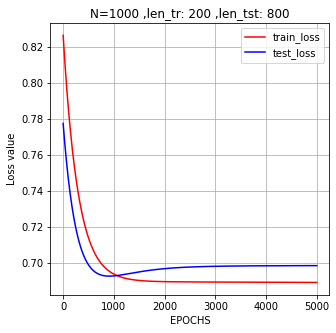


train loss  0.6894239912540837
test loss 0.6911794342241057


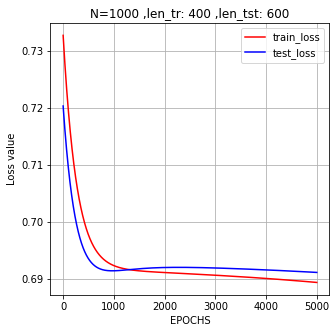


train loss  0.6913123802458044
test loss 0.6963836793189293


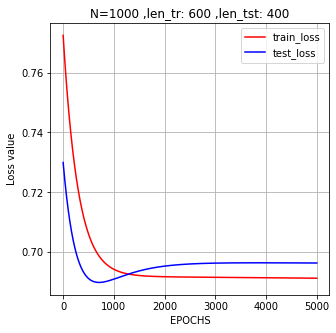


train loss  0.6931168057488841
test loss 0.6934848895022532


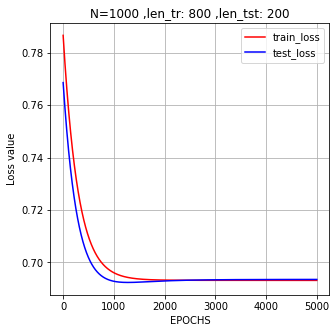

for Zero testing samples,the trainig error is :  0.691044523833653


In [ ]:
N=1000
lr2=0.01
c1=np.random.randint(2, size=N)
c2=np.random.randint(2, size=N)
gt_xor=c1^c2
noise=np.random.normal(0,0.01,size=N) ####adding noise
n_a1=c1+noise
n_a2=c2+noise

samp_set=np.vstack((np.reshape(n_a1,(1,N)),np.reshape(n_a2,(1,N))))
gt_xor=(np.reshape(gt_xor,(1,N)))
for i in range(0,N+1,int(0.2*N)):
  tr_xsplit=samp_set[0:2,0:i]
  #print(len(tr_xsplit))
  tr_ysplit=np.reshape(gt_xor[:,0:i],(1,i))
  tst_xsplit=samp_set[0:2,i:N]
  tst_ysplit=np.reshape(gt_xor[:,i:N],(1,(N-i)))
  #print((tr_xsplit).shape,(tr_ysplit).shape,(tst_xsplit).shape,(tst_ysplit).shape)
  mlp_fun(lr2,tr_xsplit,tr_ysplit,tst_xsplit,tst_ysplit)

5a:Observations: clearly, from the above plots, the difference between the test_error and train error can been seen to be decreasing(very minimal) as the no of training samples increases

5b) for a fixed train:test splits (0.4N:0.6N),(0.6N:0.4N),(0.8N:0.2N) and varying N=1000,5000,10000

In [ ]:
def tr_tst_split(N,split):
  tr_split=split*N
  c1=np.random.randint(2, size=N)
  c2=np.random.randint(2, size=N)
  gt_xor=c1^c2
  noise=np.random.normal(0,0.01,size=N)
  n_a1=c1+noise
  n_a2=c2+noise

  samp_set=np.vstack((np.reshape(n_a1,(1,N)),np.reshape(n_a2,(1,N))))
  gt_xor=(np.reshape(gt_xor,(1,N)))
  #print(int(tr_split))
  tr_xsplit=samp_set[0:2,0:int(tr_split)]
  tr_ysplit=np.reshape(gt_xor[:,0:int(tr_split)],(1,int(tr_split)))
  tst_xsplit=samp_set[0:2,int(tr_split):N]
  tst_ysplit=np.reshape(gt_xor[:,int(tr_split):N],(1,(N-int(tr_split))))
  #print((tr_xsplit).shape,(tr_ysplit).shape,(tst_xsplit).shape,(tst_ysplit).shape)
  mlp_fun(lr2,tr_xsplit,tr_ysplit,tst_xsplit,tst_ysplit)


train loss  0.6841029745311917
test loss 0.6986262738268231


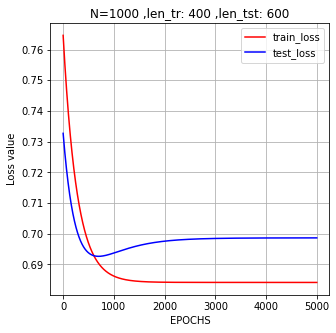


train loss  0.6926507553261355
test loss 0.6920102404656044


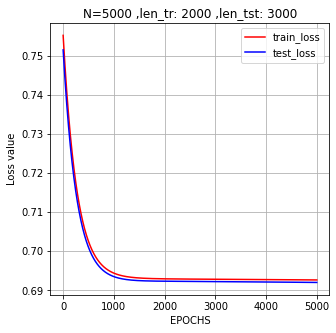


train loss  0.6921386089657763
test loss 0.6918382830720702


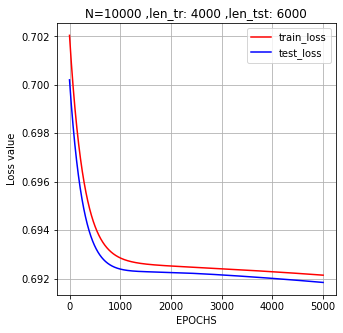

In [ ]:
#####train-test split 0.4*N:0.6*N
tr_tst_split(1000,0.4)
tr_tst_split(5000,0.4)
tr_tst_split(10000,0.4)


train loss  0.6927941356844488
test loss 0.692889793409627


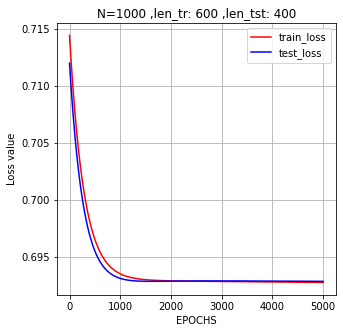


train loss  0.6937461930812491
test loss 0.6934417643898145


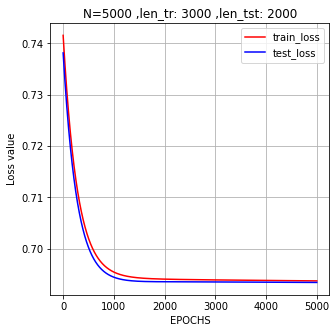


train loss  0.6895797632684479
test loss 0.6915921989692465


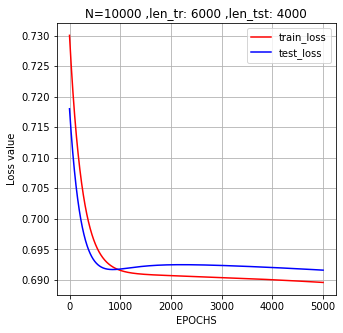

In [ ]:
#####train-test split 0.6*N:0.4*N
tr_tst_split(1000,0.6)
tr_tst_split(5000,0.6)
tr_tst_split(10000,0.6)


train loss  0.6928109277965367
test loss 0.6950162408378543


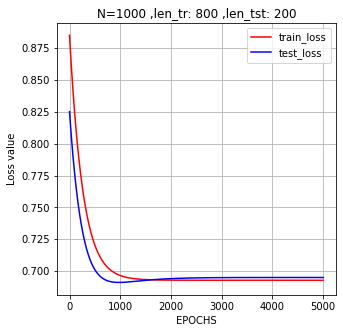


train loss  0.6931324411695303
test loss 0.6929860701325249


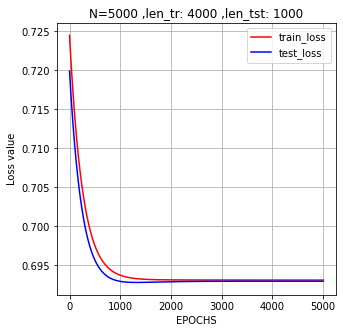


train loss  0.691293228641142
test loss 0.6925179160880192


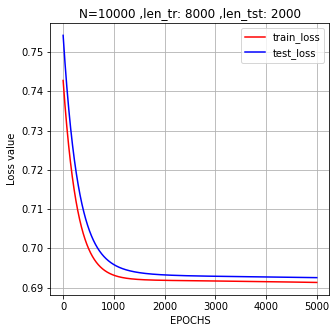

In [ ]:
#####train-test split 0.8*N:0.2*N
tr_tst_split(1000,0.8)
tr_tst_split(5000,0.8)
tr_tst_split(10000,0.8)

5b)Observations:

* for a fixed train:test split, as the N (no of samples) increases(N=1000,5000,10000) the rate of convergence is very fast for N=10000>5000>1000,i.e the difference between training and testing error is minimal at N=10000<5000<1000.
The error values are also decreasing as the N increases

* for a fixed N and varying train:test_split, the error values of training and testing errors and the difference between them is decreasing, as the no of training samples to train the model increases

* therefore the above two observtions are inline with ERM thoery i.e  
as n increases(large n), Prob(|test_error - train_error|>e)~=0 (e>0)